In [7]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearAc1 = pd.read_csv('queries_results/Poland/POL monthyear ac1 count.csv', header = 0, sep=' *, *')
POLmonthyearAc1["Time"]=pd.to_datetime(POLmonthyearAc1['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,MonthYear,Count
Actor1CountryCode,,
POL,12910400,136741
USA,12910400,79727
UKR,12910400,52973
RUS,12708899,49758
DEU,12910400,47934
EUR,12910400,42268
GBR,12910400,28939
FRA,12708899,17656
ISR,12910400,17282


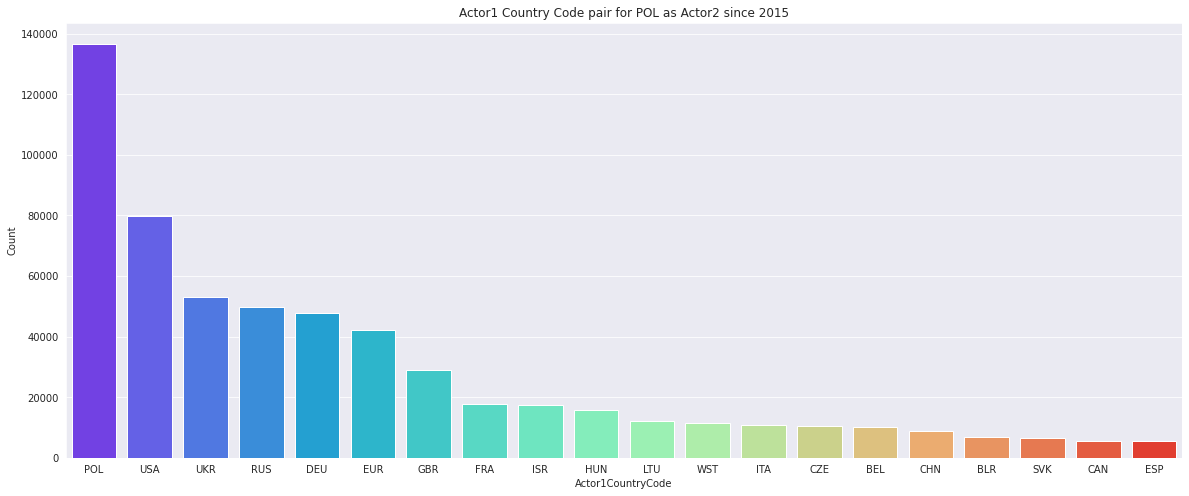

In [12]:
s = POLmonthyearAc1.groupby("Actor1CountryCode").sum().sort_values(by="Count", ascending=False).head(20)
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor1 Country Code pair for POL as Actor2 since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

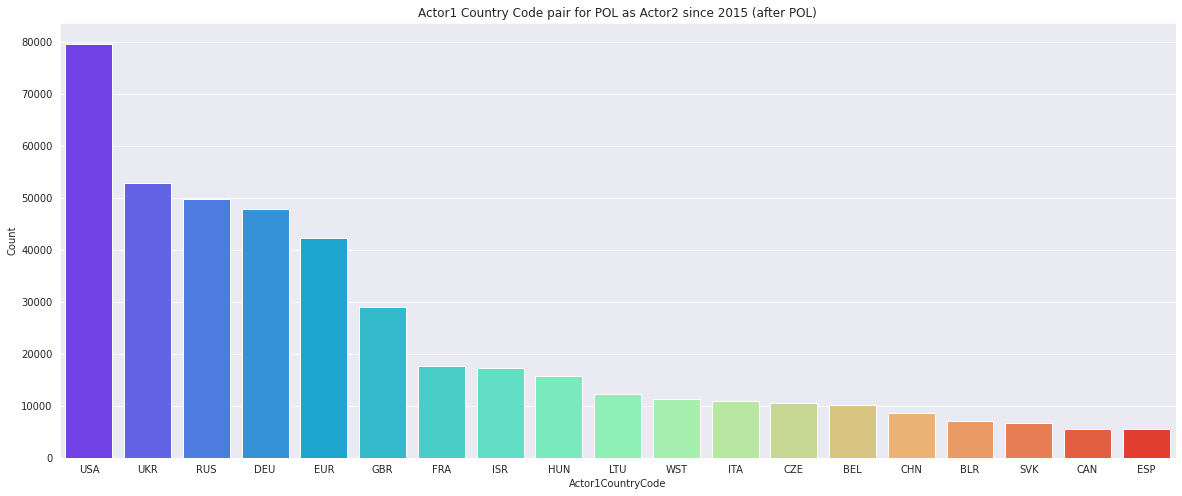

In [9]:
s = POLmonthyearAc1.groupby("Actor1CountryCode").sum().sort_values(by="Count", ascending=False).head(20)[1:]
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor1 Country Code pair for POL as Actor2 since 2015 (after POL)")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

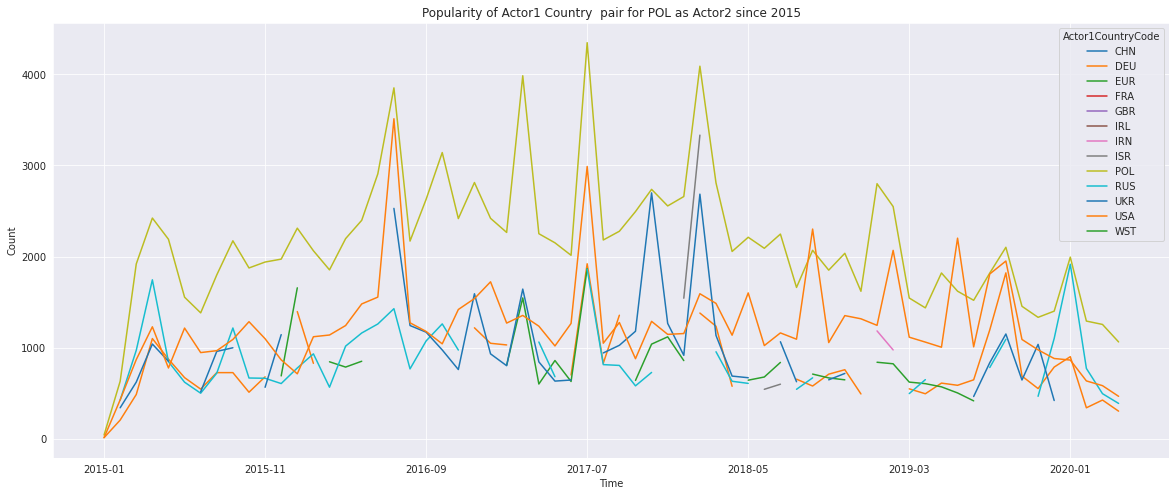

In [10]:
s = POLmonthyearAc1.groupby(["Actor1CountryCode", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(5)
s = s.groupby(["Time","Actor1CountryCode"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor1 Country  pair for POL as Actor2 since 2015")
g.figure.set_size_inches(20,8)

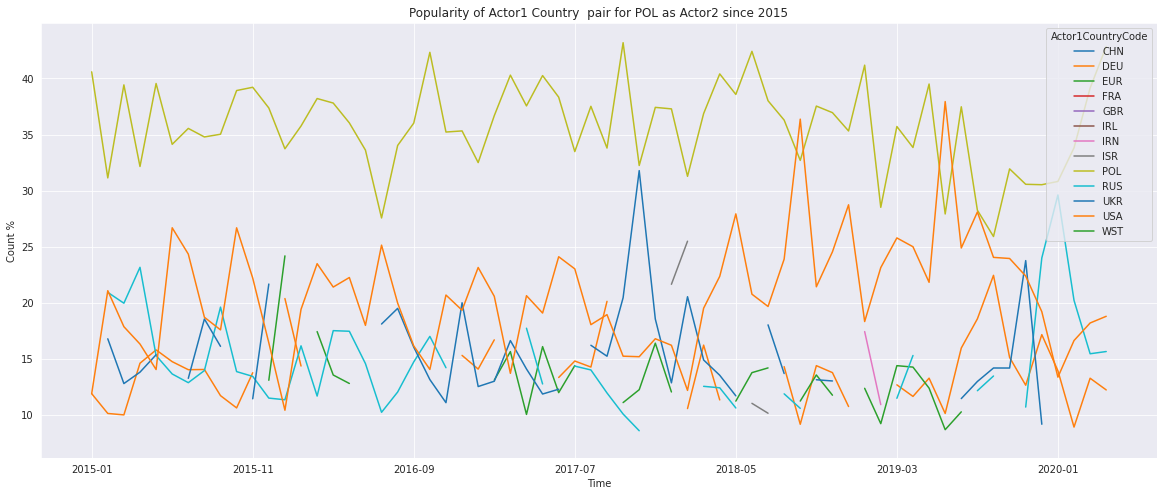

In [11]:
s = POLmonthyearAc1.groupby(["Actor1CountryCode", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(5)
s = s.groupby(["Time","Actor1CountryCode"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor1 Country  pair for POL as Actor2 since 2015")
g.figure.set_size_inches(20,8)